202101544 마영준

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

In [7]:
model = nn.Sequential(
    nn.Linear(1,8),
    nn.ReLU(),
    nn.Linear(8,10),
    nn.ReLU(),
    nn.Linear(10,8),
    nn.ReLU(),
    nn.Linear(8,1)
)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

In [8]:
# 모델의 학습
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss.detach().numpy())


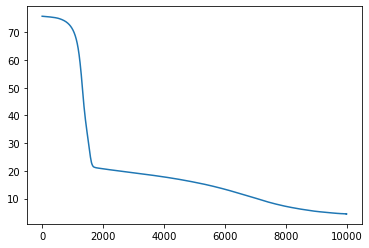

In [9]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

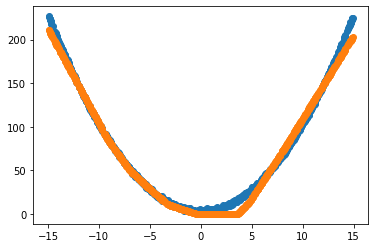

In [11]:
# model을 아래와 같이 튜닝
# 1->8->10->8->1

plt.clf()
plt.scatter(x,y_noise)
plt.scatter(x,output.detach().numpy())
plt.show()

202101544 마영준